# Caso 3
Fecha: 24/11/2024
### Integrantes
- Jose Manuel Villa Romero
- Sebastian Vasquez Grajales
- Juan Camilo Castaño Marulanda

## 1. Preparación del Conjuntos de Datos:
Encontramos un dataset genérico en la página de Kaggle sobre distintas especies de la flor iris.  
DataSet: [Link](https://www.kaggle.com/datasets/uciml/iris?select=Iris.csv)


In [55]:
import pandas as pd

archivo_csv = 'iris.csv'
datos_csv = pd.read_csv(archivo_csv)
df = pd.DataFrame(datos_csv)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [56]:
# Solo utilizo las columnas con valores numéricos, logicamente excluyo el ID ya que este no se modifica
my_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
numeric_data = df[my_columns]

# you need to install the scikit-learn library
# pip install scikit-learn

from sklearn.preprocessing import StandardScaler
# Estandarización de datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_data)

# Convierto de nuevo a DataFrame para facilitar el análisis
data_scaled_df = pd.DataFrame(data_scaled, columns=my_columns)
data_scaled_df.head() #Miro las primeras filas

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


## 2. Aplicación del PCA:

In [57]:
# Aplicando el PCA
from sklearn.decomposition import PCA
pca = PCA()
data_pca = pca.fit_transform(data_scaled_df)

# Convierte los componentes principales a un DataFrame
pca_df = pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(data_pca.shape[1])])
pca_df

,PC1,PC2,PC3,PC4
0,-2.264542,0.505704,0.121943,-0.023073
1,-2.086426,-0.655405,0.227251,-0.103208
2,-2.367950,-0.318477,-0.051480,-0.027825
3,-2.304197,-0.575368,-0.098860,0.066311
4,-2.388777,0.674767,-0.021428,0.037397
...,...,...,...,...
145,1.870522,0.382822,-0.254532,-0.388890
146,1.558492,-0.905314,0.025382,-0.221322
147,1.520845,0.266795,-0.179277,-0.118903
148,1.376391,1.016362,-0.931405,-0.024146


## 3. Visualización de los Resultados de PCA:
### Gráficos de dispersión

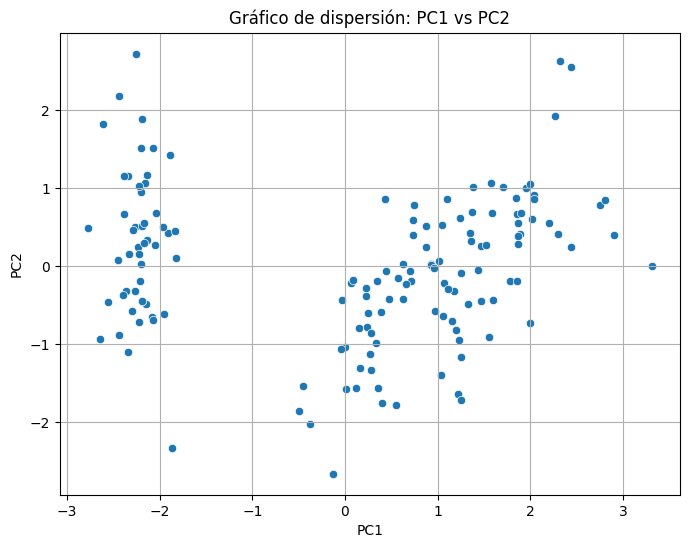

In [58]:
# Instalo las librerías matplotlib y seaborn
# pip install matplotlib
# pip install seaborn

import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'])
plt.title('Gráfico de dispersión: PC1 vs PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

### Gráfico de codo (varianza)

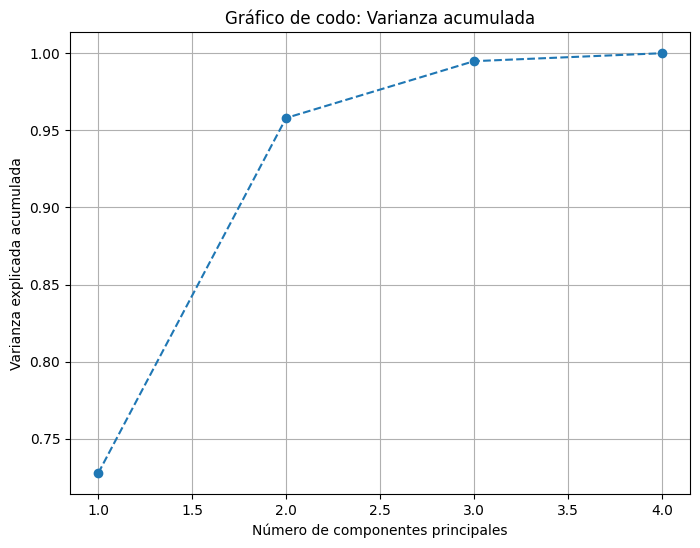

In [59]:
# Calcula la varianza explicada acumulada
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Gráfico de codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Gráfico de codo: Varianza acumulada')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid()
plt.show()

## 4. Interpretación de los Componentes Principales
a) Cargas de las variables en los componentes principales
Las cargas indican qué tan influyente es cada variable en un componente principal:

In [60]:
# Cargas de las variables (eigenvectors)
components = pd.DataFrame(pca.components_, columns=data_scaled_df.columns, index=[f'PC{i+1}' for i in range(len(pca.components_))])
print(components)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
PC1       0.522372     -0.263355       0.581254      0.565611
PC2       0.372318      0.925556       0.021095      0.065416
PC3       0.721017     -0.242033      -0.140892     -0.633801
PC4      -0.261996      0.124135       0.801154     -0.523546


b) Análisis del peso relativo de los componentes

In [61]:
# Varianza explicada por componente
for i, var in enumerate(explained_variance, start=1):
    print(f"Componente {i}: {var:.2%} de varianza explicada")

Componente 1: 72.77% de varianza explicada
Componente 2: 23.03% de varianza explicada
Componente 3: 3.68% de varianza explicada
Componente 4: 0.52% de varianza explicada
